In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scripts import openFile
import pickle
import re
import time


In [7]:
D    = openFile('Dados/imdbFull.p')
Docs = D.data
y    = D.target
print('Número de exemplos :',len(Docs))
print('Classes dos dados  :', np.unique(y))

Número de exemplos : 50000
Classes dos dados  : [ 1  2  3  4  7  8  9 10]


Text(0.5, 0, 'Índice do Exemplo')

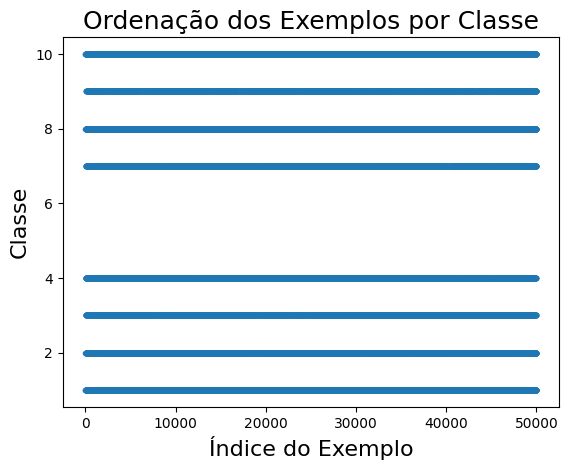

In [8]:
plt.plot(y, '.')
plt.title('Ordenação dos Exemplos por Classe', fontsize=18)
plt.ylabel('Classe', fontsize=16)
plt.xlabel('Índice do Exemplo', fontsize=16)

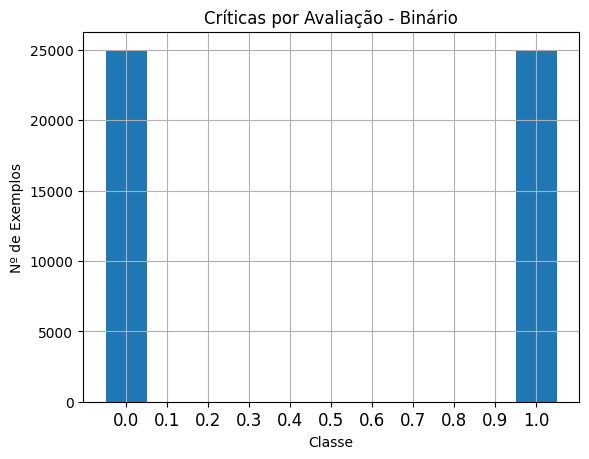

In [9]:
yB = y.copy()
yB[yB < 5] = 0
yB[yB > 6] = 1

labels, counts = np.unique(yB, return_counts=True)
plt.title('Críticas por Avaliação - Binário')
plt.bar(labels, counts, align='center',width=0.1)
plt.xticks(np.arange(0,1.1,0.1), fontsize=12)
plt.ylabel('Nº de Exemplos')
plt.xlabel('Classe')
plt.grid()
plt.show()

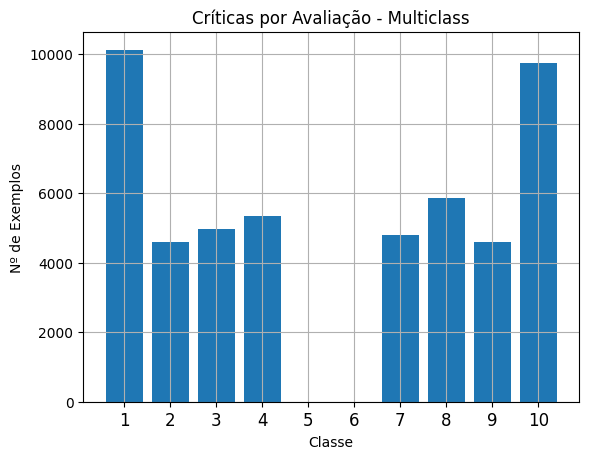

In [10]:
labels, counts = np.unique(y, return_counts=True)
plt.title('Críticas por Avaliação - Multiclass')
plt.bar(labels, counts, align='center')
plt.xticks(np.arange(1,11,1), fontsize=12)
plt.ylabel('Nº de Exemplos')
plt.xlabel('Classe')
plt.grid()
plt.show()

### Limpar dos dados
- Substituição mudanças de linhas

In [11]:
Docs = [doc.replace('<br />', ' ') for doc in Docs]

- Remoção de tudo o que não seja caracteres do alfabeto

In [12]:
Docs = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs]

### SnowBall Stemming
- Em palavras simples, a derivação é a redução de uma palavra à sua palavra base ou radical de tal forma que as palavras de tipo semelhante fiquem sob um radical comum.
- Por exemplo – As palavras cuidar, cuidar e cuidar estão sob o mesmo radical 'cuidado'. Stemming é importante no processamento de linguagem natural (PNL).

In [13]:
from nltk.stem import SnowballStemmer
stemmed_data_path = 'Dados/stemsnowball.p'

In [14]:
iniciar = time.time()
stemFunc = SnowballStemmer(language='english')
Docs2 = [' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs]
acabar = time.time()
duracao = acabar - iniciar
print('SnowballStemmer durou cerca de ', duracao, ' segundos')

SnowballStemmer durou cerca de  89.64884281158447  segundos


In [15]:
# Criação do dicionario com os data com keys e os target como values
imdb_snowball = {'Docs' : Docs2, 'y':y}

In [16]:
# dump dos dados
pickle.dump(imdb_snowball, open(stemmed_data_path, 'wb'))

In [17]:
#load dos dados para verificação
imdb_snowball = pickle.load(open(stemmed_data_path, 'rb'))
print(imdb_snowball.keys())

dict_keys(['Docs', 'y'])


### Calculo dos tfi-dfs usando TfidVectorizer
- Patterns de 2, 3 e 4;
- Min_dfs de 2, 3, 4 e5

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tok_path = 'tfidf/toks_min_df_tp_on_size.p'

In [19]:
patterns = [r'\b\w\w+\b', r'\b\w\w\w+\b', r'\b\w\w\w\w+\b']
min_dfs = [2,3,4,5]

In [20]:
iniciar = time.time()

results = np.zeros(shape=(4,3))

for i in range(len(min_dfs)):
    for j in range(len(patterns)):
        min_df = min_dfs[i]
        tp = patterns[j]
        tfidf = TfidfVectorizer(min_df = min_df, token_pattern = tp, ngram_range=(1,1)).fit(Docs)
        tokens = tfidf.get_feature_names()
        results[i][j] = len(tokens)


acabar = time.time()
duracao = acabar - iniciar

print('O pré-processamento de dados durou ', duracao, 'segundos')

C:\Users\amvlf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


O pré-processamento de dados durou  87.7188470363617 segundos


In [21]:
tok = {'results' : results}
pickle.dump(tok, open(tok_path, 'wb'))

In [22]:
results = pickle.load(open(tok_path, 'rb'))['results']

In [23]:
_x = np.array(min_dfs)
_y = np.array([2,3,4])

_xx, _yy = np.meshgrid(_x, _y)
# os x são os mindfs
# os y são os patterns
x, y = _xx.ravel(), _yy.ravel() # .ravel() converte tudo para a mesma dimensão(1D)
print(x)
print(y)

[2 3 4 5 2 3 4 5 2 3 4 5]
[2 2 2 2 3 3 3 3 4 4 4 4]


In [24]:
dimensao = results[x-2, y-2]/1000 # /1000 para não aparecer muitos 0's no gráfico
bottom = np.zeros_like(dimensao) # returns um array de 0's com o mesmo shape e type do arrat dimensao
width = depth = 1

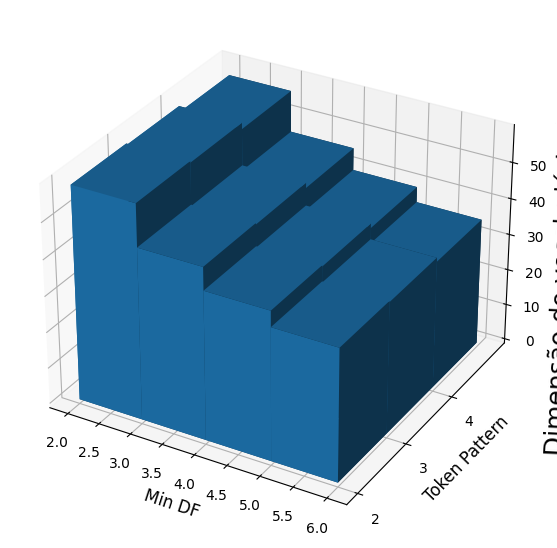

In [25]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(121, projection='3d')

ax1.bar3d(x, y, bottom, width, depth, dimensao, shade=True)
ax1.set_title('')
ax1.set_xlabel('Min DF', fontsize=12)
ax1.set_ylabel('Token Pattern', fontsize=12)
ax1.set_yticks([2,3,4])
ax1.set_zlabel('Dimensão do vocabulário (milhares)', fontsize=18)    
plt.show()